In [15]:
import pandas as pd
df = pd.read_csv('C:\\Users\\colacan\\Documents\\GitHub\\Kartrider_Meta_Analysis_Project\kartrider_data_2.csv')

In [16]:
df = df.drop('Unnamed: 0', axis = 1)

In [17]:
# 전처리 이전의 df
df

,channelName,startTime,endTime,gameSpeed,matchId,matchResult,matchType,playTime,trackId,players,...,flyingPet,partsEngine,partsHandle,partsWheel,partsKit,rankinggrade2,matchRank,matchRetired,matchWin,matchTime
0,speedIndiCombine,2022-03-01T00:29:59.214000,2022-03-01T00:32:13.874000,7.0,007b000b37473ae9,0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,123.0,936626b1d09165291db82c65c8533f6a023e1f72669741...,"[{'accountNo': '1191237030', 'characterName': ...",...,7a7c82225a7e19701d446f6bd2a3028235c158a8b3c0d9...,0.0,0.0,0.0,0.0,3,2,0,0.0,114328.0
1,speedIndiCombine,2022-03-01T00:29:59.214000,2022-03-01T00:32:13.874000,7.0,007b000b37473ae9,0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,123.0,936626b1d09165291db82c65c8533f6a023e1f72669741...,"[{'accountNo': '1191237030', 'characterName': ...",...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,3,99,1,0.0,NaN
2,speedIndiCombine,2022-03-01T00:29:59.214000,2022-03-01T00:32:13.874000,7.0,007b000b37473ae9,0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,123.0,936626b1d09165291db82c65c8533f6a023e1f72669741...,"[{'accountNo': '1191237030', 'characterName': ...",...,7a7c82225a7e19701d446f6bd2a3028235c158a8b3c0d9...,3.0,3.0,3.0,3.0,3,3,0,0.0,116088.0
3,speedIndiCombine,2022-03-01T00:29:59.214000,2022-03-01T00:32:13.874000,7.0,007b000b37473ae9,0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,123.0,936626b1d09165291db82c65c8533f6a023e1f72669741...,"[{'accountNo': '1191237030', 'characterName': ...",...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,2.0,0.0,1.0,2.0,3,1,0,1.0,113731.0
4,speedIndiInfinit,2022-03-01T00:29:57.179000,2022-03-01T00:31:22.935000,4.0,0251000d37476ca7,0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,76.0,b57588a6c4fd89fbc2a2c9e9c1a95a746c35ab3ee08e39...,"[{'accountNo': '1476537523', 'characterName': ...",...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,3,1,0,1.0,66634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116389,itemIndiCombine,2022-03-08T23:58:02.305000,2022-03-09T00:00:39.966000,7.0,016800091f3c3089,0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,146.0,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,"[{'accountNo': '1644525327', 'characterName': ...",...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,4,5,0,0.0,140697.0
116390,itemIndiCombine,2022-03-08T23:58:02.305000,2022-03-09T00:00:39.966000,7.0,016800091f3c3089,0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,146.0,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,"[{'accountNo': '1644525327', 'characterName': ...",...,a86786a4492d950e3739a918089fba61e5ba99ec46083e...,NaN,NaN,NaN,NaN,2,99,1,0.0,NaN
116391,itemIndiCombine,2022-03-08T23:58:02.305000,2022-03-09T00:00:39.966000,7.0,016800091f3c3089,0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,146.0,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,"[{'accountNo': '1644525327', 'characterName': ...",...,44338a00eafb0d85851fa471384b28c5c6683ec5e61637...,1.0,1.0,1.0,1.0,0,4,0,0.0,140652.0
116392,itemIndiCombine,2022-03-08T23:58:02.305000,2022-03-09T00:00:39.966000,7.0,016800091f3c3089,0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,146.0,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,"[{'accountNo': '1644525327', 'characterName': ...",...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,3,3,0,0.0,140534.0


In [18]:
df.duplicated().sum()

0

In [19]:
# 필요없는 columns 드롭
df = df.drop(['character','characterName','accountNo','players','matchId','startTime','endTime','matchResult','license','matchRetired','matchWin','playTime','matchTime'],axis=1)

<AxesSubplot:>

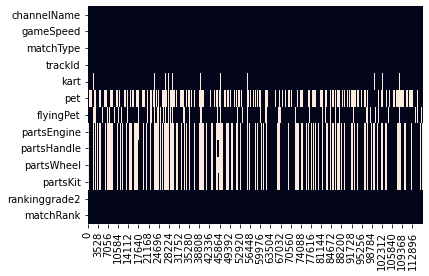

In [20]:
# 결측치 비율 확인

import seaborn as sns
sns.heatmap(df.isnull().T,cbar=False)

In [21]:
# battle 데이터는 협력전이므로 제외
df= df[df['channelName'] != 'battle']

In [22]:
# 결측치 제거
df = df.dropna(subset= ['kart', 'matchRank'])

In [23]:
# 결측치 대체
values = {'pet':'non_pet', 'flyingPet':'non_flyingPet', 'partsEngine':'over_ver_engine', 'partsHandle':'over_ver_handle','partsWheel':'over_ver_wheel','partsKit':'over_ver_kit'}
df = df.fillna(value=values)

In [24]:
# 인덱스 재정렬
df = df.reset_index()
df = df.drop('index',axis=1)

In [25]:
df

,channelName,gameSpeed,matchType,trackId,kart,pet,flyingPet,partsEngine,partsHandle,partsWheel,partsKit,rankinggrade2,matchRank
0,speedIndiCombine,7.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,936626b1d09165291db82c65c8533f6a023e1f72669741...,826f4a85b74f291472189c317c70155e754875675f3082...,non_pet,7a7c82225a7e19701d446f6bd2a3028235c158a8b3c0d9...,0.0,0.0,0.0,0.0,3,2
1,speedIndiCombine,7.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,936626b1d09165291db82c65c8533f6a023e1f72669741...,0b41bf8620b5851d7dcc7eb33765d506e530b8d2e612e6...,fde208f0931f9d4ddb97b315b84ac6e15d4e4f0e1f799b...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,3,99
2,speedIndiCombine,7.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,936626b1d09165291db82c65c8533f6a023e1f72669741...,dd0685efa8397ab65468ea28f229fa61a1ca2e8fe7e311...,f69c4abf9ae9fe3818287b017b06c93a19933cbf0e6e8d...,7a7c82225a7e19701d446f6bd2a3028235c158a8b3c0d9...,3.0,3.0,3.0,3.0,3,3
3,speedIndiCombine,7.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,936626b1d09165291db82c65c8533f6a023e1f72669741...,d47aa62de79d88ecee263e07456555d99ff8957f1760d0...,non_pet,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,2.0,0.0,1.0,2.0,3,1
4,speedIndiInfinit,4.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,b57588a6c4fd89fbc2a2c9e9c1a95a746c35ab3ee08e39...,82ef440c285247789c576cd0f7dfc9b047bff7606baf3a...,f69c4abf9ae9fe3818287b017b06c93a19933cbf0e6e8d...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101977,itemIndiCombine,7.0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,faf963e754c62f90d61f127d4c7f17d04947cce93acd96...,c70baab2d17098faa3c9d44388d6e3fb2f5a717631d7da...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,4,5
101978,itemIndiCombine,7.0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,d1bb276d82e79398a211df10113f27b24678178b9176cf...,b5e59da7e51a056fca10406d710af9898b1f29e4182036...,a86786a4492d950e3739a918089fba61e5ba99ec46083e...,over_ver_engine,over_ver_handle,over_ver_wheel,over_ver_kit,2,99
101979,itemIndiCombine,7.0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,7e9af2569848299f8aae60f4cfdeb21df32daa1f26aef4...,b5e59da7e51a056fca10406d710af9898b1f29e4182036...,44338a00eafb0d85851fa471384b28c5c6683ec5e61637...,1.0,1.0,1.0,1.0,0,4
101980,itemIndiCombine,7.0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,22f6e7faf98caf43b1bad667f77daabb4d77656226448f...,non_pet,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,3,3


In [26]:
df = df[df['matchRank'] != 0]

In [27]:
# 전처리 이후의 df
df

,channelName,gameSpeed,matchType,trackId,kart,pet,flyingPet,partsEngine,partsHandle,partsWheel,partsKit,rankinggrade2,matchRank
0,speedIndiCombine,7.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,936626b1d09165291db82c65c8533f6a023e1f72669741...,826f4a85b74f291472189c317c70155e754875675f3082...,non_pet,7a7c82225a7e19701d446f6bd2a3028235c158a8b3c0d9...,0.0,0.0,0.0,0.0,3,2
1,speedIndiCombine,7.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,936626b1d09165291db82c65c8533f6a023e1f72669741...,0b41bf8620b5851d7dcc7eb33765d506e530b8d2e612e6...,fde208f0931f9d4ddb97b315b84ac6e15d4e4f0e1f799b...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,3,99
2,speedIndiCombine,7.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,936626b1d09165291db82c65c8533f6a023e1f72669741...,dd0685efa8397ab65468ea28f229fa61a1ca2e8fe7e311...,f69c4abf9ae9fe3818287b017b06c93a19933cbf0e6e8d...,7a7c82225a7e19701d446f6bd2a3028235c158a8b3c0d9...,3.0,3.0,3.0,3.0,3,3
3,speedIndiCombine,7.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,936626b1d09165291db82c65c8533f6a023e1f72669741...,d47aa62de79d88ecee263e07456555d99ff8957f1760d0...,non_pet,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,2.0,0.0,1.0,2.0,3,1
4,speedIndiInfinit,4.0,7b9f0fd5377c38514dbb78ebe63ac6c3b81009d5a31dd5...,b57588a6c4fd89fbc2a2c9e9c1a95a746c35ab3ee08e39...,82ef440c285247789c576cd0f7dfc9b047bff7606baf3a...,f69c4abf9ae9fe3818287b017b06c93a19933cbf0e6e8d...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101977,itemIndiCombine,7.0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,faf963e754c62f90d61f127d4c7f17d04947cce93acd96...,c70baab2d17098faa3c9d44388d6e3fb2f5a717631d7da...,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,4,5
101978,itemIndiCombine,7.0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,d1bb276d82e79398a211df10113f27b24678178b9176cf...,b5e59da7e51a056fca10406d710af9898b1f29e4182036...,a86786a4492d950e3739a918089fba61e5ba99ec46083e...,over_ver_engine,over_ver_handle,over_ver_wheel,over_ver_kit,2,99
101979,itemIndiCombine,7.0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,7e9af2569848299f8aae60f4cfdeb21df32daa1f26aef4...,b5e59da7e51a056fca10406d710af9898b1f29e4182036...,44338a00eafb0d85851fa471384b28c5c6683ec5e61637...,1.0,1.0,1.0,1.0,0,4
101980,itemIndiCombine,7.0,7ca6fd44026a2c8f5d939b60aa56b4b1714b9cc2355ec5...,2534a9e0a5d477de6097d635513b1bc16afb9d7ef15116...,22f6e7faf98caf43b1bad667f77daabb4d77656226448f...,non_pet,a87cb96d91a4e0c357c4eaeb7dbc05ef515d183e79a8aa...,0.0,0.0,0.0,0.0,3,3


In [29]:
df.to_csv('kartrider_eda_2.csv',encoding='utf-8-sig')